#**Created by Andi Sadri Agung**

#Mounting Drive
To connect Google Drive with google colab, where Google Drive is used later to store datasets that have been downloaded from:https://www.kaggle.com/datasets/gunavenkatdoddi/eye-diseases-classification

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
pip install opencv-python

In [ ]:
pip install numpy

In [ ]:
pip install scikit-image

In [3]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
from PIL import Image, ImageFilter
from skimage.feature import graycomatrix, graycoprops

#Data Collection and Preparation

###Reading Dataset

In [ ]:
def count_files_in_directory(directory_path, file_extension): #Function to access files image in folder path
    count = 0
    for filename in os.listdir(directory_path):
        if filename.endswith(file_extension):
            count += 1
    return count

file_extension_jpg = ".jpg"
file_extension_png = ".png"

normal_path = r'/content/drive/MyDrive/01. MY PERSONAL BRANDING/Dibimbing InternPro Bukit Vista/dataset/normal' #Path dataset for normal image
normal_count_jpg = count_files_in_directory(normal_path, file_extension_jpg) #Count image with png format
normal_count_png = count_files_in_directory(normal_path, file_extension_png) #Count image with jpg format
print(f"Normal Images in Dataset: {normal_count_jpg + normal_count_png} (JPG: {normal_count_jpg}, PNG: {normal_count_png})") #Print all image format

cataract_path = r'/content/drive/MyDrive/01. MY PERSONAL BRANDING/Dibimbing InternPro Bukit Vista/dataset/cataract' #Path dataset for cataract image
cataract_count_jpg = count_files_in_directory(cataract_path, file_extension_jpg)
cataract_count_png = count_files_in_directory(cataract_path, file_extension_png)
print(f"Cataract Images in Dataset: {cataract_count_jpg + cataract_count_png} (JPG: {cataract_count_jpg}, PNG: {cataract_count_png})")


Normal Images in Dataset: 1395 (JPG: 1395, PNG: 0)
Cataract Images in Dataset: 1218 (JPG: 1218, PNG: 0)


###Function Convert PNG to JPG file

In [ ]:
def convert_png_to_jpg(directory_path): #Function to convert png to jpg on dataset
    if not os.path.exists(directory_path):
        print(f"Directory {directory_path} not found.")
        return
    for filename in os.listdir(directory_path):
        if filename.lower().endswith(".png"):
            png_path = os.path.join(directory_path, filename)
            jpg_filename = filename.replace(".png", ".jpg")
            jpg_path = os.path.join(directory_path, jpg_filename)
            if os.path.exists(jpg_path):
                print(f"File JPG {jpg_filename} has exist. Ignore conversions {filename}.")
            else:
                try:
                    with Image.open(png_path) as img:
                        img = img.convert("RGB")
                        img.save(jpg_path, "JPEG")
                    print(f"File {filename} successfully converted to JPG.")
                except Exception as e:
                    print(f"Conversions file {filename} failed with an error message : {e}")

directory_path = '/content/drive/MyDrive/MY PERSONAL BRANDING/Dibimbing InternPro Bukit Vista/dataset/cataract/'

# Call of function convert PNG to JPG on directory path
convert_png_to_jpg(directory_path)

File JPG Cataract (3).jpg has exist. Ignore conversions Cataract (3).png.
File JPG Cataract (2).jpg has exist. Ignore conversions Cataract (2).png.
File JPG Cataract (100).jpg has exist. Ignore conversions Cataract (100).png.
File JPG Cataract (99).jpg has exist. Ignore conversions Cataract (99).png.
File JPG Cataract (98).jpg has exist. Ignore conversions Cataract (98).png.
File JPG Cataract (1).jpg has exist. Ignore conversions Cataract (1).png.
File JPG Cataract (5).jpg has exist. Ignore conversions Cataract (5).png.
File JPG Cataract (7).jpg has exist. Ignore conversions Cataract (7).png.
File JPG Cataract (11).jpg has exist. Ignore conversions Cataract (11).png.
File JPG Cataract (10).jpg has exist. Ignore conversions Cataract (10).png.
File JPG Cataract (4).jpg has exist. Ignore conversions Cataract (4).png.
File JPG Cataract (9).jpg has exist. Ignore conversions Cataract (9).png.
File JPG Cataract (6).jpg has exist. Ignore conversions Cataract (6).png.
File JPG Cataract (8).jpg 

###Function Delete PNG File

In [ ]:
def delete_png(direktori):
    try:
        for filename in os.listdir(direktori):
            if filename.endswith(".png"):
                file_path = os.path.join(direktori, filename)
                os.remove(file_path)
                print(f"File {filename} delete successfully.")
    except OSError as e:
        print(f"Error: {e}")

path_direktori = "/content/drive/MyDrive/MY PERSONAL BRANDING/Dibimbing InternPro Bukit Vista/dataset/cataract/"
delete_png(path_direktori)

File Cataract (3).png delete successfully.
File Cataract (2).png delete successfully.
File Cataract (100).png delete successfully.
File Cataract (99).png delete successfully.
File Cataract (98).png delete successfully.
File Cataract (1).png delete successfully.
File Cataract (5).png delete successfully.
File Cataract (7).png delete successfully.
File Cataract (11).png delete successfully.
File Cataract (10).png delete successfully.
File Cataract (4).png delete successfully.
File Cataract (9).png delete successfully.
File Cataract (6).png delete successfully.
File Cataract (8).png delete successfully.
File Cataract (19).png delete successfully.
File Cataract (18).png delete successfully.
File Cataract (14).png delete successfully.
File Cataract (13).png delete successfully.
File Cataract (12).png delete successfully.
File Cataract (17).png delete successfully.
File Cataract (16).png delete successfully.
File Cataract (15).png delete successfully.
File Cataract (20).png delete successful

In [ ]:
print(f"Normal Images in Dataset: {normal_count_jpg + normal_count_png} (JPG: {normal_count_jpg}, PNG: {normal_count_png})")
print(f"Cataract Images in Dataset: {cataract_count_jpg + cataract_count_png} (JPG: {cataract_count_jpg}, PNG: {cataract_count_png})")

Normal Images in Dataset: 1074 (JPG: 1074, PNG: 0)
Cataract Images in Dataset: 938 (JPG: 938, PNG: 0)


#Data Augmentation

In [ ]:
def extract_image_number(filename):
    start = filename.find('(')
    end = filename.find(')')
    if start == -1 or end == -1:  # Check if both parentheses are present
        return None
    try:
        return int(filename[start + 1:end])
    except ValueError:
        return None

def normal_augment_images(path, size):
    image_files = [filename for filename in os.listdir(path) if filename.endswith('.jpg')]
    image_numbers = [extract_image_number(filename) for filename in image_files]
    number = int(0.3 * size)
    for i in range(number):
        rand = random.choice(image_numbers)
        imagePath = os.path.join(path, f'Normal ({rand}).jpg')
        image = Image.open(imagePath)
        image = image.filter(ImageFilter.GaussianBlur)
        image.save(os.path.join(path, f'Normal ({size + i}).jpg'))  # Save with the same format as the original
    return size + number

def cataract_augment_images(path, size):
    image_files = [filename for filename in os.listdir(path) if filename.endswith('.jpg')]
    image_numbers = [extract_image_number(filename) for filename in image_files]
    number = int(0.3 * size)
    for i in range(number):
        rand = random.choice(image_numbers)
        imagePath = os.path.join(path, f'Cataract ({rand}).jpg')
        image = Image.open(imagePath)
        image = image.filter(ImageFilter.GaussianBlur)
        image.save(os.path.join(path, f'Cataract ({size + i}).jpg'))
    return size + number

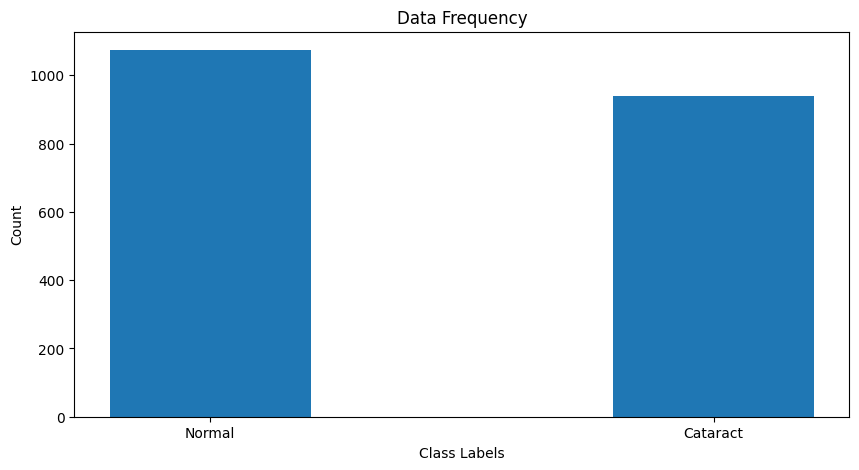

In [ ]:
def graph(file_normal, file_cataract): #Function to make graph of count image
    keys = ["Normal", "Cataract"]
    values = [file_normal, file_cataract]
    fig = plt.figure(figsize = (10, 5))
    plt.bar(keys, values, width = 0.4)
    plt.xlabel("Class Labels")
    plt.ylabel("Count")
    plt.title("Data Frequency")
    plt.show()
graph(file_normal, file_cataract)

In [ ]:
normal_augmented = normal_augment_images(normal_path, file_normal)
print(f"Augmented {normal_augmented} images in {normal_path}")

cataract_augmented = cataract_augment_images(cataract_path, file_cataract)
print(f"Augmented {cataract_augmented} images in {cataract_path}")

Augmented 1396 images in /content/drive/MyDrive/MY PERSONAL BRANDING/Dibimbing InternPro Bukit Vista/dataset/normal/
Augmented 1219 images in /content/drive/MyDrive/MY PERSONAL BRANDING/Dibimbing InternPro Bukit Vista/dataset/cataract/


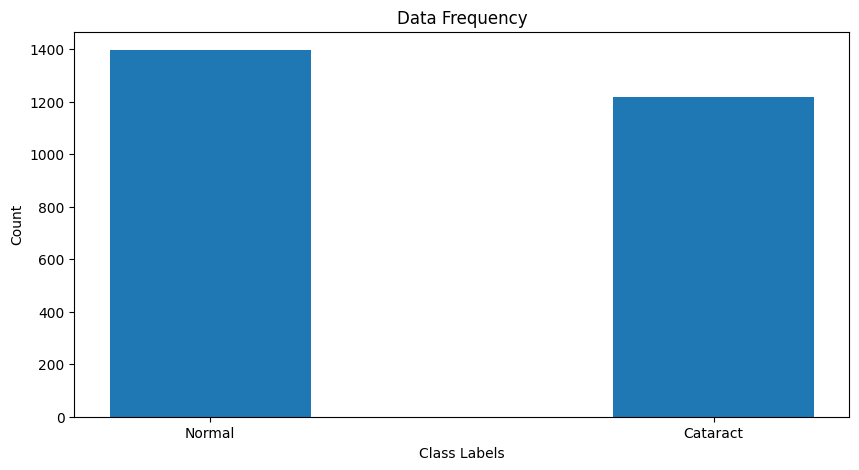

In [ ]:
graph(normal_augmented, cataract_augmented)

#Feature Extraction and Data Visualization for Image Sample

In [ ]:
def get_image(path, color):
    img = cv.imread(path)
    img = cv.cvtColor(img, color)
    return img

def get_thresh_image(path):
    img = get_image(path, cv.COLOR_BGR2GRAY)
    img = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 11, 3)
    return img

def show_image(path, color, cmap='gray'):
    img = get_image(path, color)
    fig = plt.figure(figsize=(10,10))
    axes = fig.add_subplot(111)
    axes.imshow(img, cmap=cmap)

def show_image_threshold(path, cmap='gray'):
    img = get_thresh_image(path)
    fig = plt.figure(figsize=(10,10))
    axes = fig.add_subplot(111)
    axes.imshow(img, cmap=cmap)

def get_contoured(img):
    cnts = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    cnts = sorted(cnts, key=cv.contourArea, reverse=True)
    for c in cnts:
        x,y,w,h = cv.boundingRect(c)
        img = img[y:y+h, x:x+w]
        break
    img = cv.resize(img, (int(img.shape[0]/4), int(img.shape[1]/4)))
    return img

def show_image_resized(path, cmap='gray'):
    img = get_thresh_image(path)
    img = get_contoured(img)
    fig = plt.figure(figsize=(10,10))
    axes = fig.add_subplot(111)
    axes.imshow(img, cmap=cmap)

def get_feature(matrix, name):
    feature = graycoprops(matrix, name)
    result = np.average(feature)
    return result

from skimage.util.dtype import img_as_float
def show_features(path):
    img =  get_image(path, cv.COLOR_BGR2GRAY)
    glcm = graycomatrix(img, [distance], [teta], levels=256, symmetric=True, normed=True)

    for x in indextable[:-1]:
        arr = []
        feature = get_feature(glcm, x)
        arr.append(feature)
        print(f"{x} = {arr[0]}")

In [ ]:
normal_sample = '/content/drive/MyDrive/01. MY PERSONAL BRANDING/Dibimbing InternPro Bukit Vista/dataset/normal/Normal (1).jpg' #Sample for Visualization
cataract_sample = '/content/drive/MyDrive/01. MY PERSONAL BRANDING/Dibimbing InternPro Bukit Vista/dataset/cataract/Cataract (1).jpg'

##Visualization Sample Images

###Normal

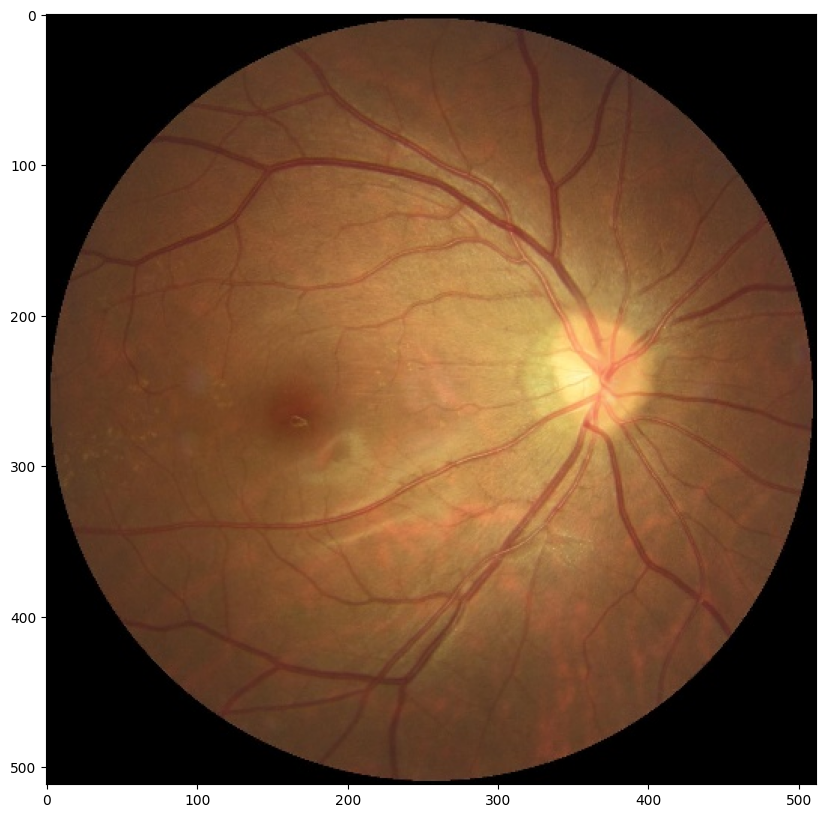

In [ ]:
show_image(normal_sample, cv.COLOR_BGR2RGB)

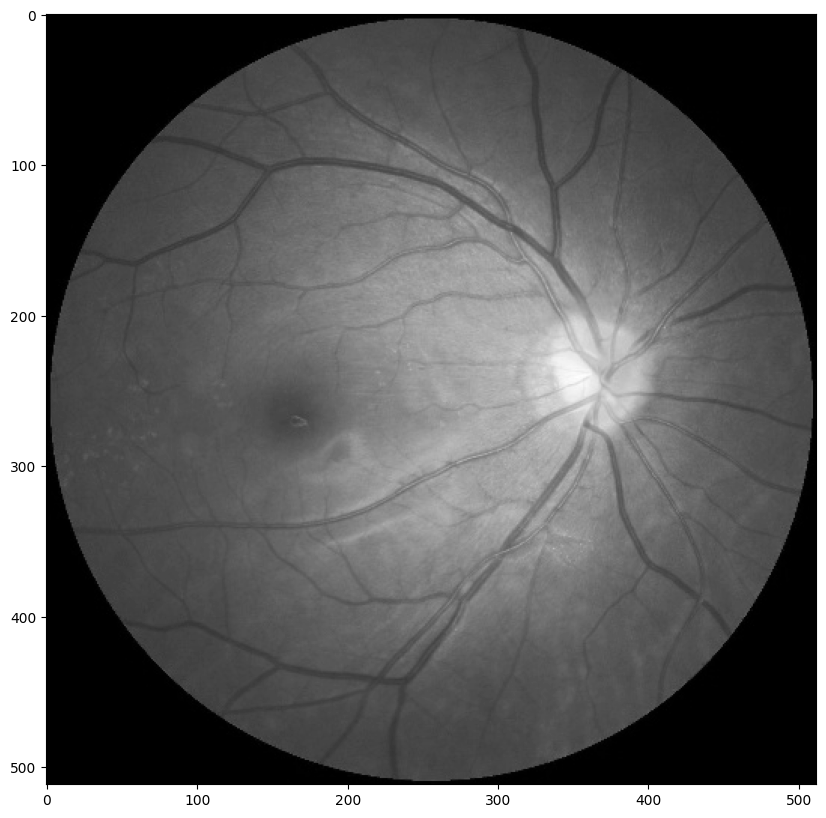

In [ ]:
show_image(normal_sample, cv.COLOR_BGR2GRAY)

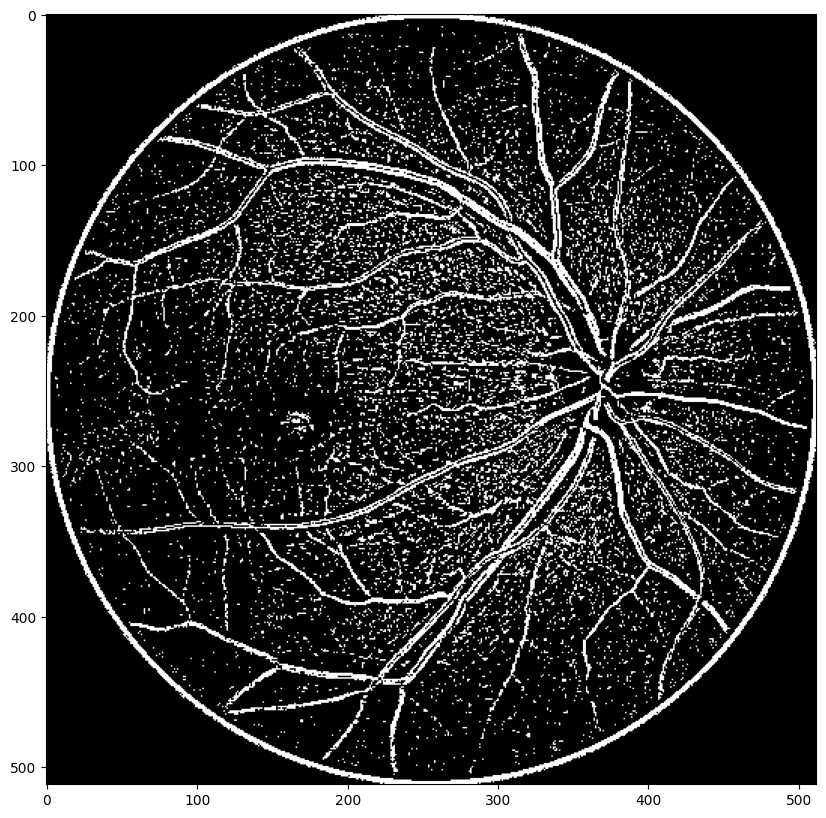

In [ ]:
show_image_threshold(normal_sample)

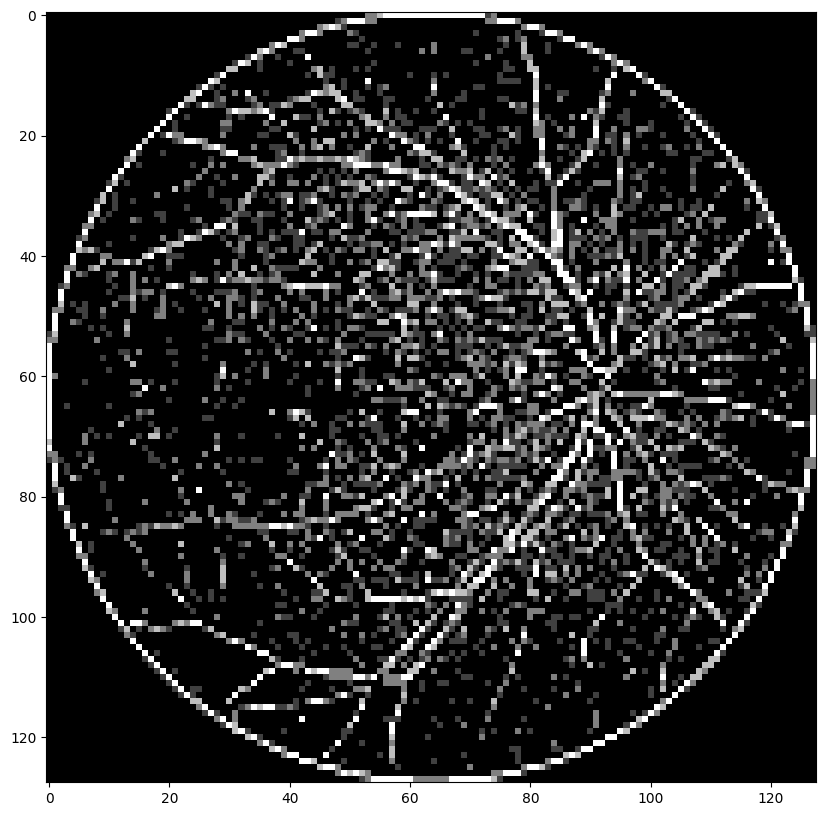

In [ ]:
show_image_resized(normal_sample)

In [ ]:
show_features(normal_sample)

dissimilarity = 7.691336234561136
contrast = 227.2855113414004
homogeneity = 0.3119826238407235
energy = 0.17230254155725708
ASM = 0.0296881658270903
correlation = 0.9531620637859811


###Cataract

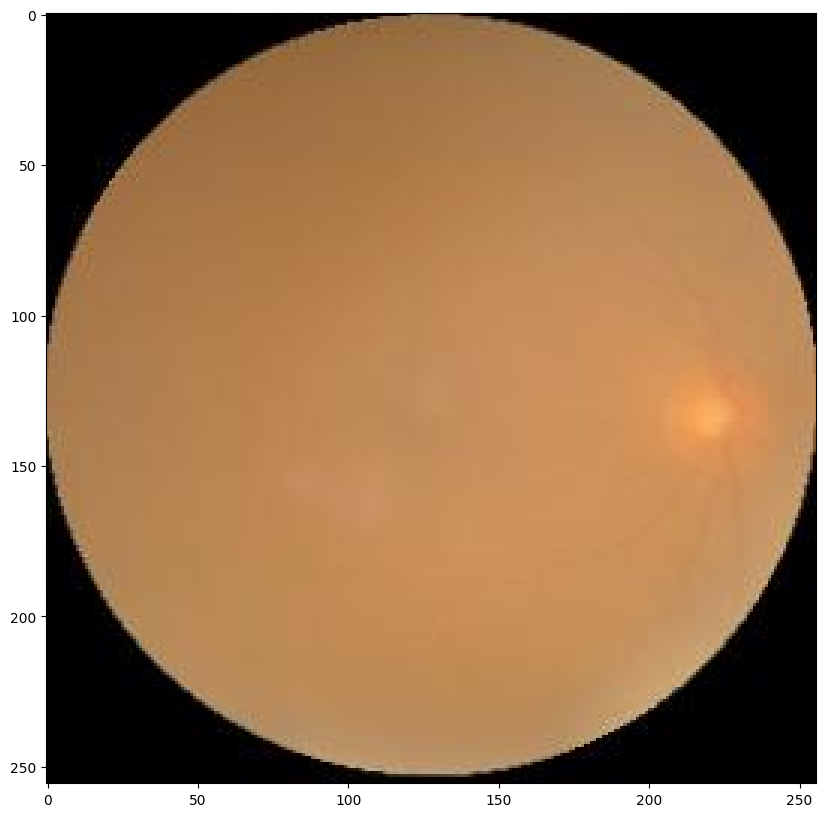

In [ ]:
show_image(cataract_sample, cv.COLOR_BGR2RGB)

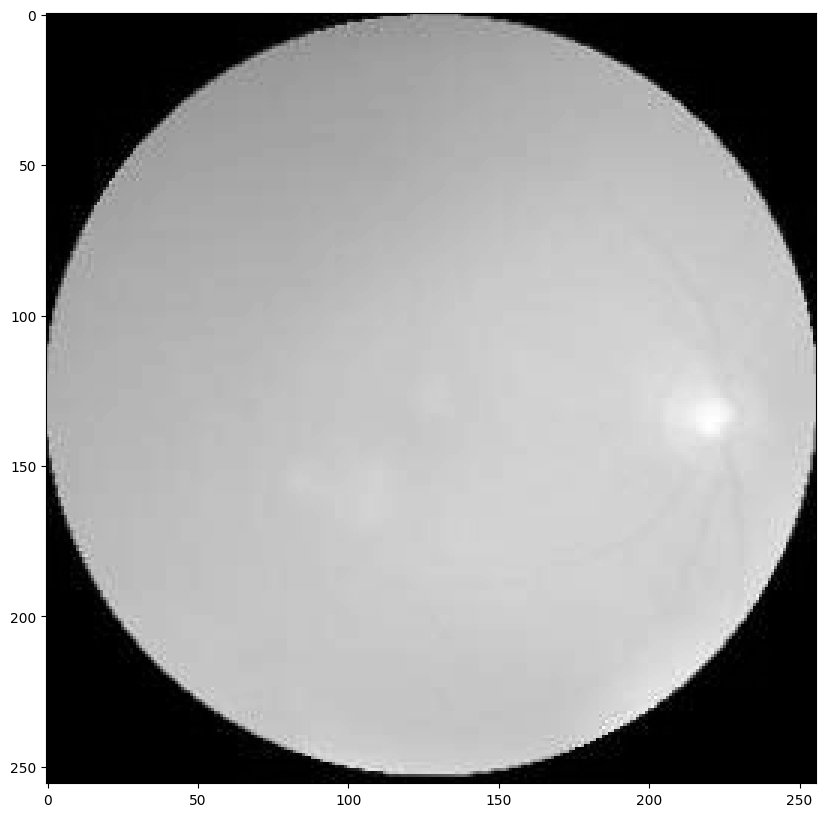

In [ ]:
show_image(cataract_sample, cv.COLOR_BGR2GRAY)

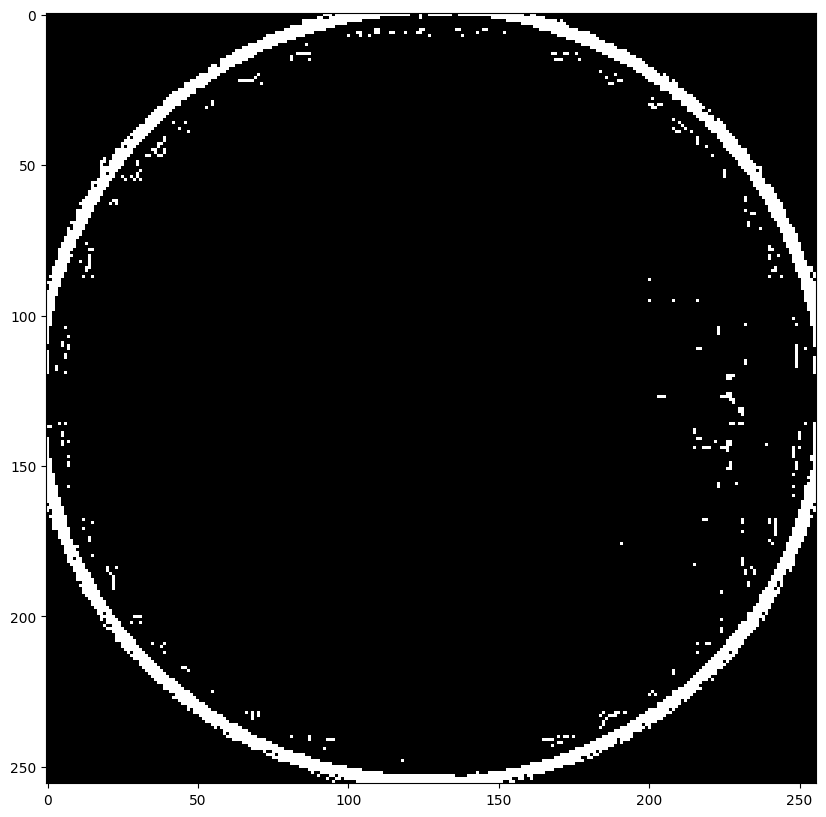

In [ ]:
show_image_threshold(cataract_sample)

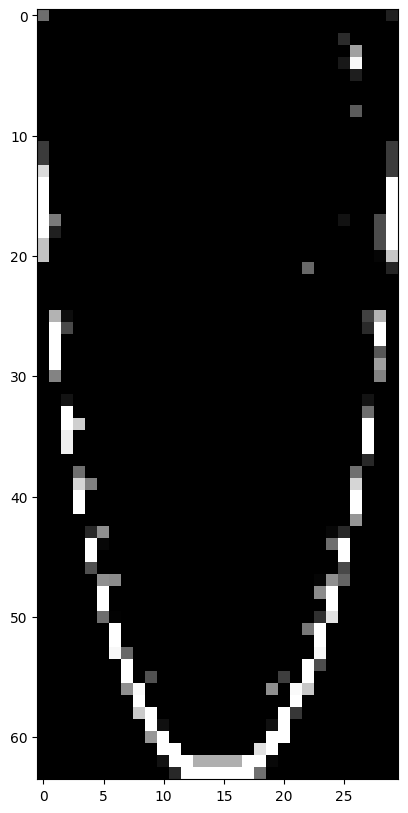

In [ ]:
show_image_resized(cataract_sample)

In [ ]:
show_features(cataract_sample)

dissimilarity = 10.072633506844035
contrast = 1096.987516869096
homogeneity = 0.4297944075369369
energy = 0.11887652264525021
ASM = 0.014131627636226687
correlation = 0.8303938015416925


#Data Preprocessing and Feature Extraction for Dataset Folder

##Feature Extraction




In [ ]:
def get_image(folder_path, category):
    images = []
    folder_dir = os.path.join(folder_path, category)
    for filename in os.listdir(folder_dir):
        img_path = os.path.join(folder_dir, filename)
        img = cv2.imread(img_path)
        images.append(img)
    return images

def get_thresh_image(image, threshold_value):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)
    return thresh_image

def show_image(image, title="Image"):
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

def show_image_threshold(thresh_image, title="Threshold Image"):
    plt.figure(figsize=(6, 6))
    plt.imshow(thresh_image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

def get_contoured(image, threshold_value):
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contoured_image = np.copy(image)
    cv2.drawContours(contoured_image, contours, -1, (0, 255, 0), 2)
    return contoured_image

def show_image_resize(image, new_width, new_height, title="Resized Image"):
    resized_image = cv2.resize(image, (new_width, new_height))
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()
def get_feature(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    glcm = greycomatrix(gray_image, [5], [0], 256, symmetric=True, normed=True)
    glcm_features = {
        'dissimilarity': greycoprops(glcm, 'dissimilarity')[0, 0],
        'contrast': greycoprops(glcm, 'contrast')[0, 0],
        'homogeneity': greycoprops(glcm, 'homogeneity')[0, 0],
        'energy': greycoprops(glcm, 'energy')[0, 0],
        'ASM': greycoprops(glcm, 'ASM')[0, 0],
        'correlation': greycoprops(glcm, 'correlation')[0, 0]
    }
    return glcm_features

##Data Processing

In [ ]:
# Path folder dataset
folder_path = "/content/drive/MyDrive/01. MY PERSONAL BRANDING/Dibimbing InternPro Bukit Vista/dataset"

# Mendapatkan gambar dari folder Normal dan Cataract
images_normal = get_image(folder_path, 'normal')
images_cataract = get_image(folder_path, 'cataract')

# Menghitung fitur GLCM
glcm_features_normal = [get_feature(img) for img in images_normal]
glcm_features_cataract = [get_feature(img) for img in images_cataract]

Output streaming akan dipotong hingga 5000 baris terakhir.
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_ve

##Saving Feature Value on DataFrame

In [ ]:
indextable = ['dissimilarity', 'contrast', 'homogeneity', 'energy', 'ASM', 'correlation', 'Label']
data_eye = np.zeros((len(images_normal) + len(images_cataract), len(indextable)))

##Data Labelling

In [ ]:
for i, features in enumerate(glcm_features_normal):
    data_eye[i, :-1] = list(features.values())
    data_eye[i, -1] = 0  # 0 for Normal Class

for i, features in enumerate(glcm_features_cataract):
    data_eye[i + len(images_normal), :-1] = list(features.values())
    data_eye[i + len(images_normal), -1] = 1  # 1 for Cataract Class

##Create DataFrame

In [ ]:
df = pd.DataFrame(data_eye, columns=indextable)

##Shuffle Data CSV for Randomize Label and Saving

In [ ]:
from sklearn.utils import shuffle
df = shuffle(df)
df.head()

df.to_csv("eye_features.csv", index=False)

In [ ]:
print(f"Length our dataset : {len(df)}")

Length our dataset : 2613


#Exploratory of Data Analysis (EDA)

In [ ]:
df = pd.read_csv('/content/eye_features.csv')
df.head()

dissimilarity    contrast  homogeneity    energy       ASM  correlation  \
0       5.009889  195.987145     0.419225  0.170422  0.029044     0.971927   
1       6.119946  209.627350     0.335224  0.173280  0.030026     0.964206   
2       4.427338  244.896928     0.544958  0.159238  0.025357     0.927395   
3       5.036713  162.043493     0.356804  0.176229  0.031057     0.966346   
4       4.699993  225.901762     0.415741  0.183007  0.033492     0.953237   

   Label  
0    0.0  
1    0.0  
2    1.0  
3    0.0  
4    0.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2613 entries, 2235 to 2457
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dissimilarity  2613 non-null   float64
 1   contrast       2613 non-null   float64
 2   homogeneity    2613 non-null   float64
 3   energy         2613 non-null   float64
 4   ASM            2613 non-null   float64
 5   correlation    2613 non-null   float64
 6   Label          2613 non-null   float64
dtypes: float64(7)
memory usage: 163.3 KB


In [ ]:
df.describe()

dissimilarity     contrast  homogeneity       energy          ASM  \
count    2613.000000  2613.000000  2613.000000  2613.000000  2613.000000   
mean        5.053957   299.306830     0.449618     0.182451     0.038480   
std         1.759445   279.874731     0.096048     0.072067     0.037922   
min         0.876291     3.996152     0.221522     0.059513     0.003542   
25%         3.811552   114.421625     0.379721     0.141659     0.020067   
50%         4.918770   217.365092     0.431197     0.176681     0.031216   
75%         6.110309   390.219948     0.515317     0.186099     0.034633   
max        13.131007  2241.987114     0.799429     0.434378     0.188684   

       correlation        Label  
count  2613.000000  2613.000000  
mean      0.948262     0.466131  
std       0.025677     0.498947  
min       0.784213     0.000000  
25%       0.936154     0.000000  
50%       0.952382     0.000000  
75%       0.966173     1.000000  
max       0.991062     1.000000

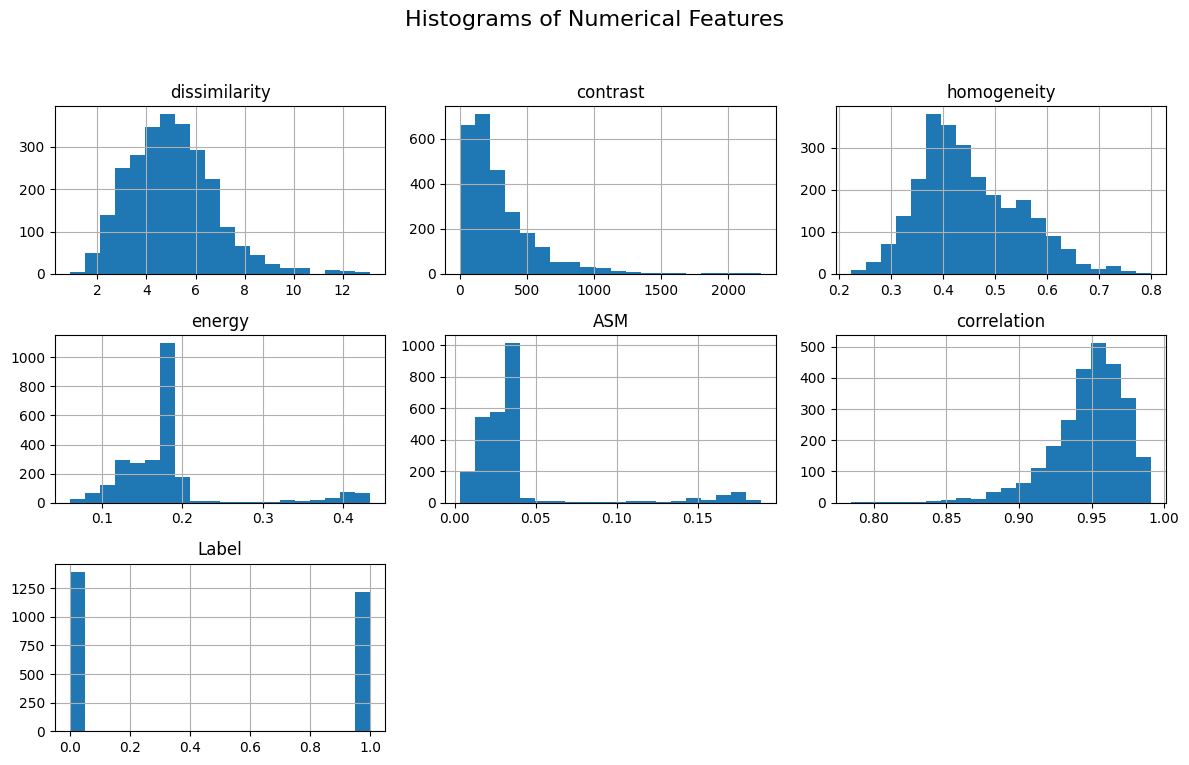

In [ ]:
df.hist(bins=20, figsize=(12, 8))
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

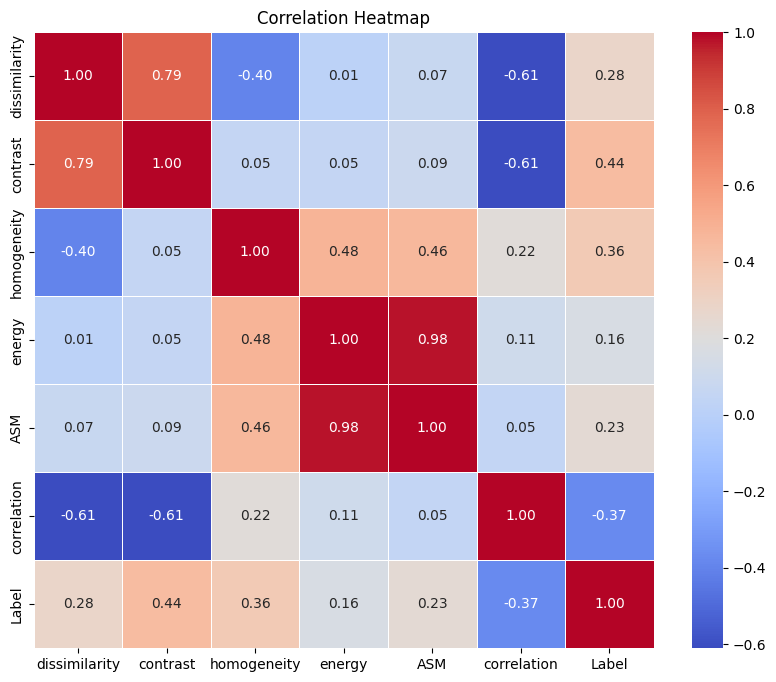

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

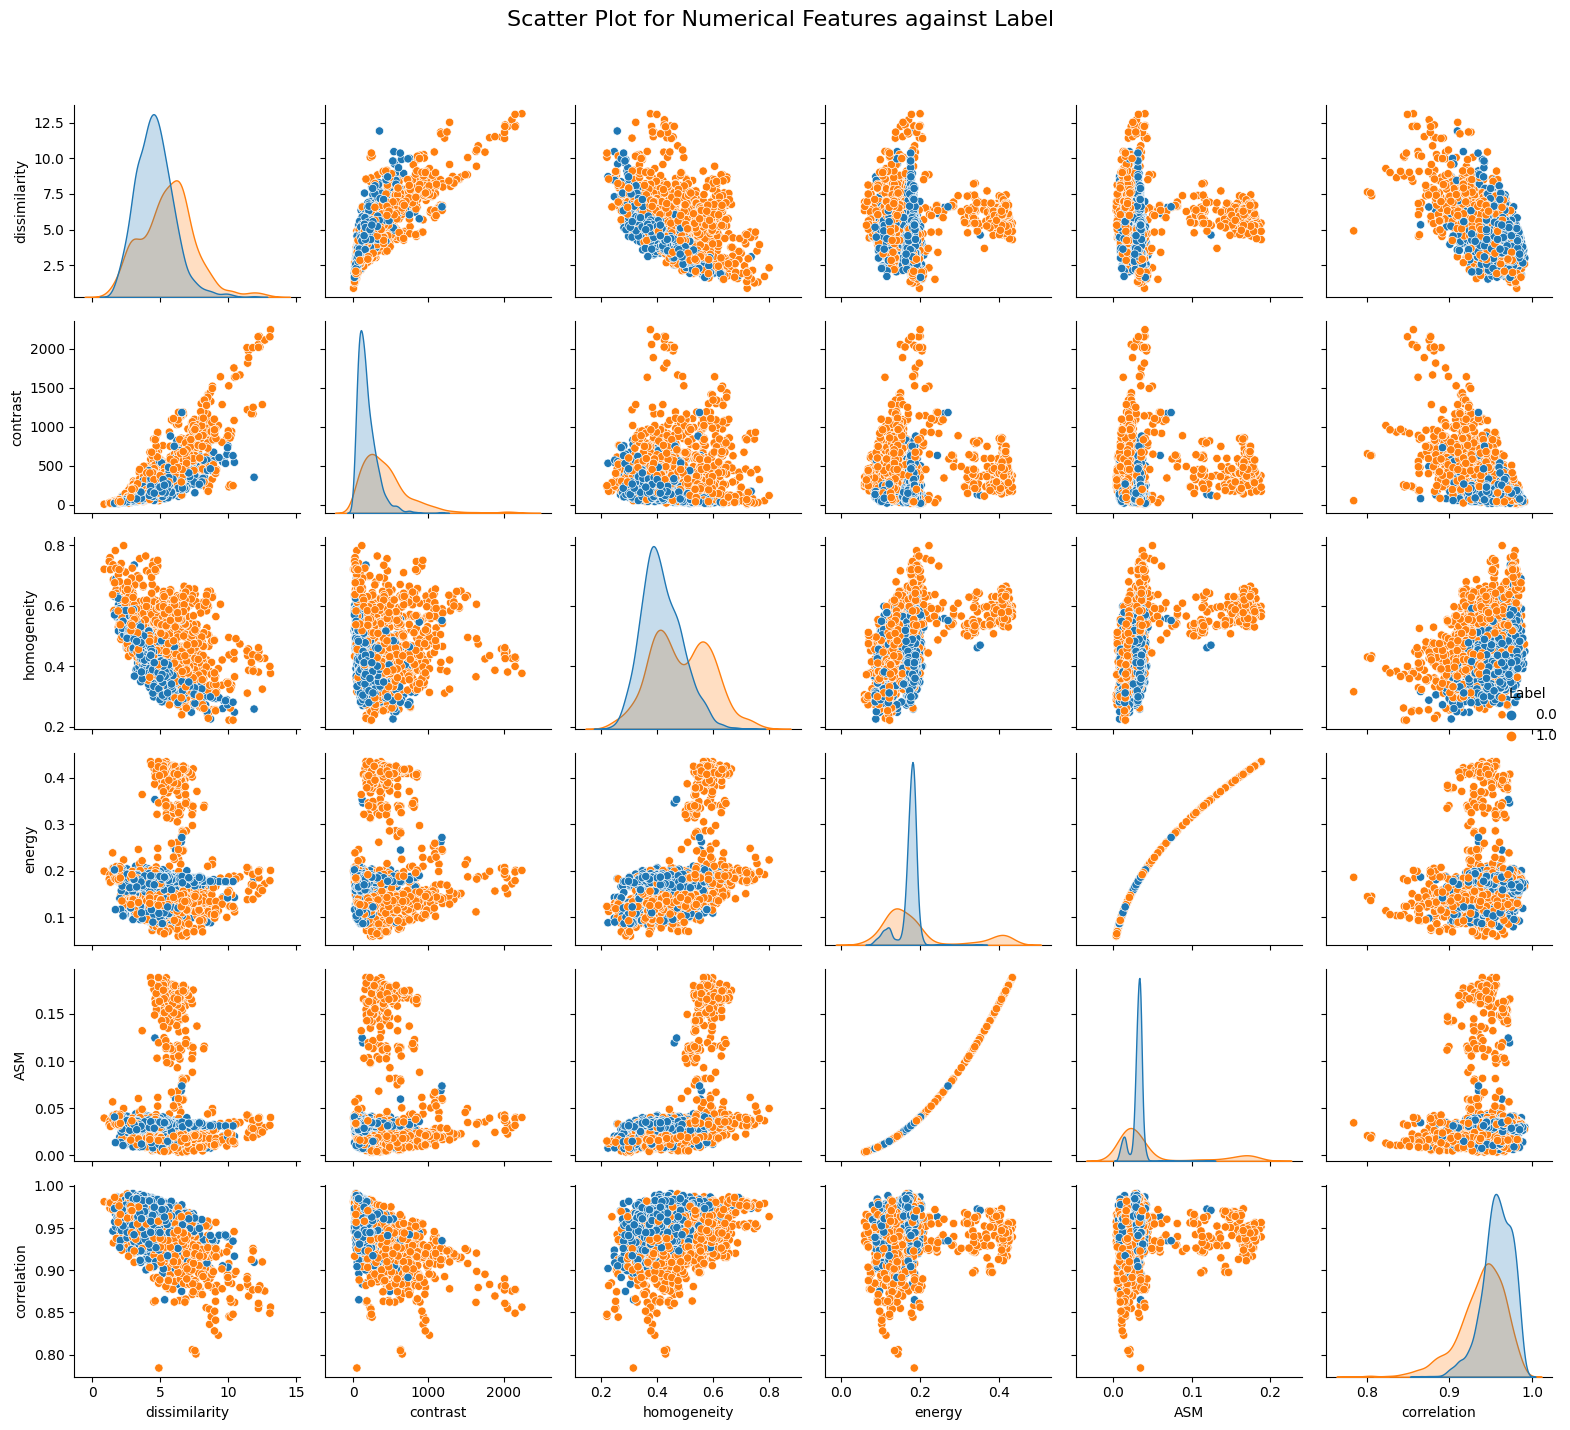

In [ ]:
sns.pairplot(df, hue='Label', diag_kind='kde')
plt.suptitle("Scatter Plot for Numerical Features against Label", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

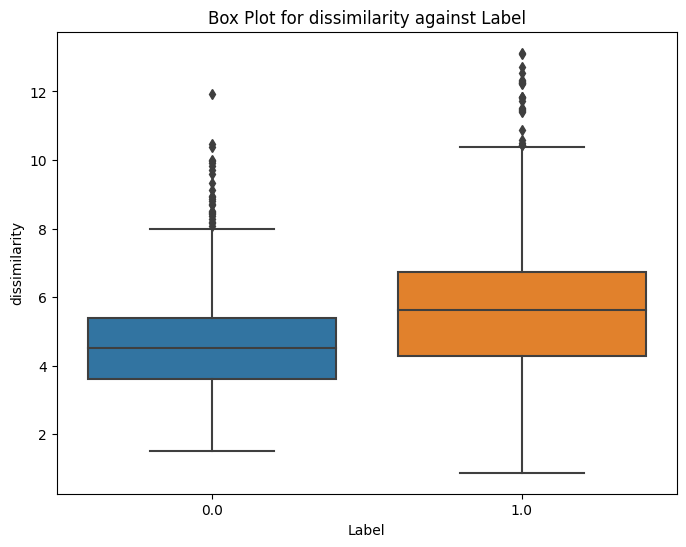

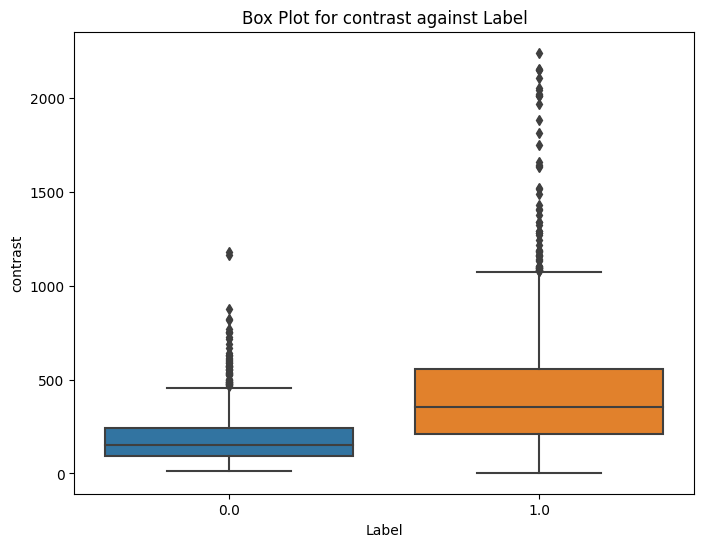

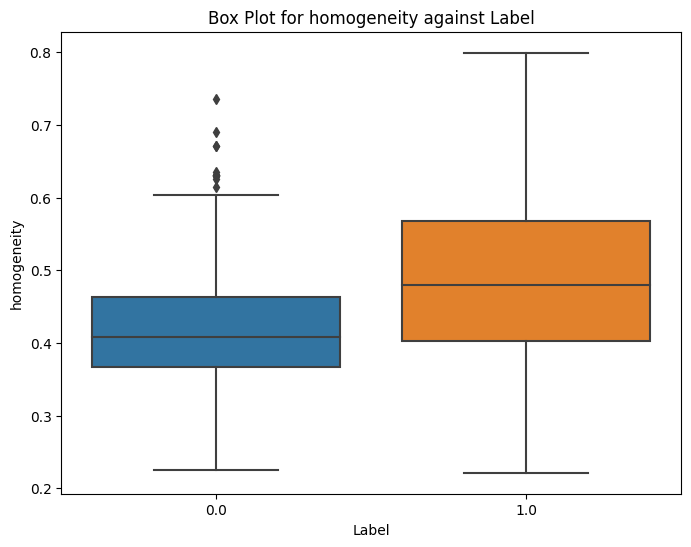

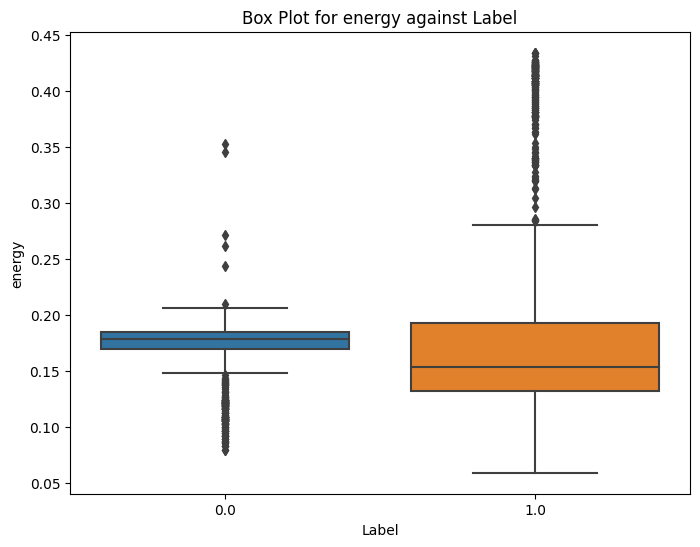

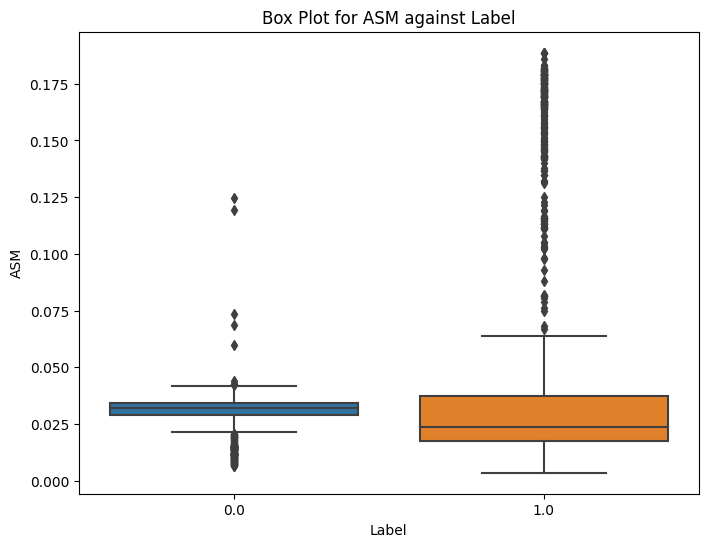

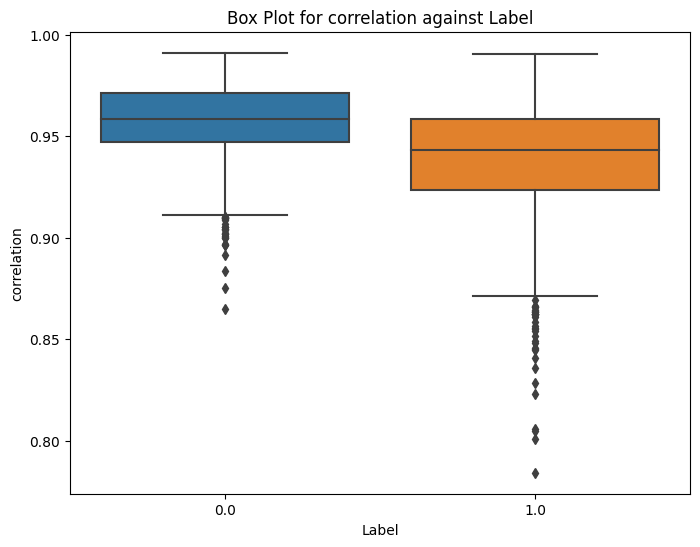

In [ ]:
for col in df.columns[:-1]:  # Exclude last column (Label)
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Label', y=col, data=df)
    plt.title(f'Box Plot for {col} against Label')
    plt.show()

Link CSV : https://drive.google.com/file/d/1RZnUw-cJ87Rz3Fxq98JMDESH4390Jj-H/view?usp=sharing

#Modelling

In [79]:
#Calling dataset clean format CSV
eyedf = pd.read_csv('/content/drive/MyDrive/01. MY PERSONAL BRANDING/Dibimbing InternPro Bukit Vista/eye_features.csv')
eyedf.head()

dissimilarity    contrast  homogeneity    energy       ASM  correlation  \
0       5.945413  131.485014     0.310984  0.179064  0.032064     0.950680   
1       6.190659  415.825906     0.311894  0.120342  0.014482     0.932317   
2       4.818914  208.472914     0.408301  0.178906  0.032007     0.941806   
3       4.237322  293.904659     0.430987  0.186874  0.034922     0.945001   
4       5.814869  343.854093     0.336236  0.146820  0.021556     0.934208   

   Label  
0    0.0  
1    0.0  
2    0.0  
3    0.0  
4    0.0

In [80]:
#Print info dataset
eyedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2613 entries, 0 to 2612
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dissimilarity  2613 non-null   float64
 1   contrast       2613 non-null   float64
 2   homogeneity    2613 non-null   float64
 3   energy         2613 non-null   float64
 4   ASM            2613 non-null   float64
 5   correlation    2613 non-null   float64
 6   Label          2613 non-null   float64
dtypes: float64(7)
memory usage: 143.0 KB


In [81]:
#Select predictor & target feature
X = eyedf.drop(['Label'], axis='columns')
y = eyedf.Label
X.head()

dissimilarity    contrast  homogeneity    energy       ASM  correlation
0       5.945413  131.485014     0.310984  0.179064  0.032064     0.950680
1       6.190659  415.825906     0.311894  0.120342  0.014482     0.932317
2       4.818914  208.472914     0.408301  0.178906  0.032007     0.941806
3       4.237322  293.904659     0.430987  0.186874  0.034922     0.945001
4       5.814869  343.854093     0.336236  0.146820  0.021556     0.934208

In [82]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Label, dtype: float64

In [83]:
#Scaling predictor to 0-1 scale with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X.iloc[:, :-1] = scaler.fit_transform(X.iloc[:, :-1])
X.head()

dissimilarity  contrast  homogeneity    energy       ASM  correlation
0       0.413647  0.056966     0.154802  0.318918  0.154055     0.950680
1       0.433659  0.184018     0.156377  0.162270  0.059092     0.932317
2       0.321723  0.091366     0.323199  0.318497  0.153750     0.941806
3       0.274264  0.129540     0.362454  0.339754  0.169493     0.945001
4       0.402994  0.151858     0.198498  0.232903  0.097300     0.934208

In [84]:
# Split data for training and testing model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [85]:
#Create 4 Model ML Classification
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto', probability=True),
        'params' : {
            'C': [1, 10, 20, 30],
            'kernel': ['rbf', 'linear', 'poly']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1, 5, 10, 50, 100]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1, 5, 10, 50, 100]
        }
    },
    'KNN' : {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 7, 11, 13]
        }
    }
}

In [107]:
#Model Test 4 algorithm for best score, best params
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

def test_model(X_train, y_train, X_test, y_test):
    scores = []

    for model_name, mp in model_params.items():
        clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        recall = recall_score(y_test, y_pred, average='micro')
        precision = precision_score(y_test, y_pred, average='micro')
        f1 = f1_score(y_test, y_pred, average='micro')
        accuracy = accuracy_score(y_test, y_pred)

        scores.append({
            'model': model_name,
            'best_score': clf.best_score_,
            'best_params': clf.best_params_,
            'confusion_matrix': cm,
            'Recall': recall,
            'Precision': precision,
            'F1-Score': f1,
            'Accuracy': accuracy
        })

    scores = sorted(scores, key=lambda x: x['best_score'], reverse=True)

    df_score = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params', 'confusion_matrix', 'Recall', 'Precision', 'F1-Score', 'Accuracy'])
    return df_score

result_df = test_model(X_train, y_train, X_test, y_test)
print(result_df)

                 model  best_score                    best_params  \
0        random_forest    0.903235           {'n_estimators': 50}   
1                  KNN    0.897221             {'n_neighbors': 7}   
2                  svm    0.853471  {'C': 20, 'kernel': 'linear'}   
3  logistic_regression    0.852384                     {'C': 100}   

         confusion_matrix    Recall  Precision  F1-Score  Accuracy  
0  [[371, 35], [43, 335]]  0.900510   0.900510  0.900510  0.900510  
1  [[372, 34], [51, 327]]  0.891582   0.891582  0.891582  0.891582  
2  [[374, 32], [83, 295]]  0.853316   0.853316  0.853316  0.853316  
3  [[367, 39], [80, 298]]  0.848214   0.848214  0.848214  0.848214  


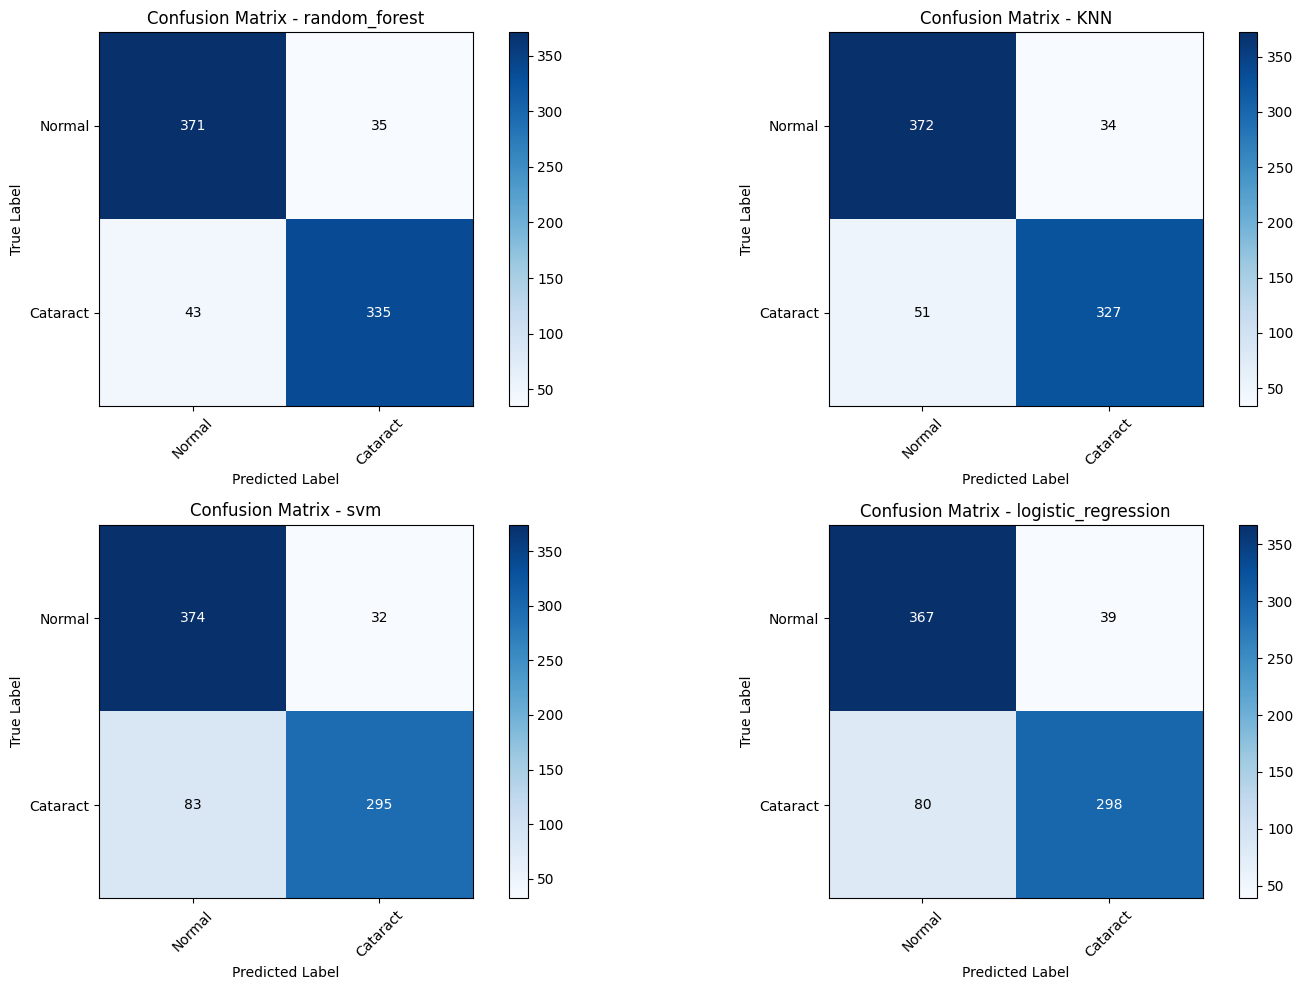

In [108]:
#Visualization Confusion Matriks Index
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(confusion_matrices, model_names):
    plt.figure(figsize=(15, 10))
    for i, cm in enumerate(confusion_matrices):
        model_name = model_names[i]
        plt.subplot(2, 2, i + 1)
        plt.title(f'Confusion Matrix - {model_name}')
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.colorbar()
        classes = ['Normal', 'Cataract']
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        for i in range(len(classes)):
            for j in range(len(classes)):
                plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')
    plt.tight_layout()

confusion_matrices = [score['confusion_matrix'] for _, score in result_df.iterrows()]
model_names = [score['model'] for _, score in result_df.iterrows()]

plot_confusion_matrix(confusion_matrices, model_names)
plt.show()

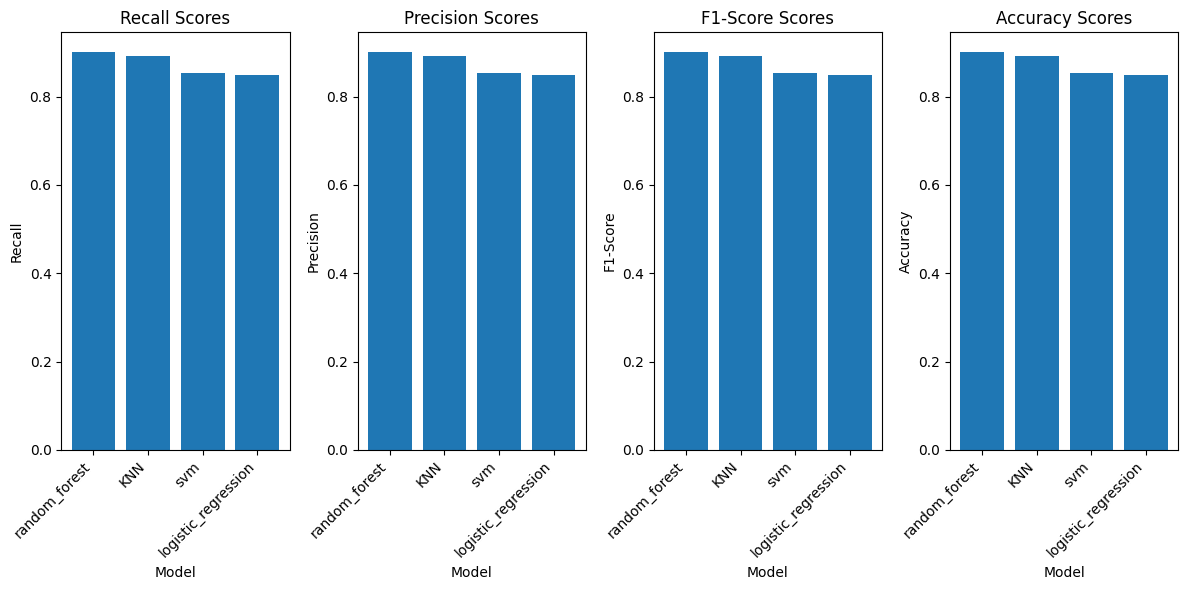

In [109]:
#Visualization Performance Confusion Matriks
plt.figure(figsize=(12, 6))

model_names = result_df['model']
recall_scores = result_df['Recall']
precision_scores = result_df['Precision']
f1_scores = result_df['F1-Score']
accuracy_scores = result_df['Accuracy']

plt.subplot(1, 4, 1)
plt.bar(model_names, recall_scores)
plt.title('Recall Scores')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 4, 2)
plt.bar(model_names, precision_scores)
plt.title('Precision Scores')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 4, 3)
plt.bar(model_names, f1_scores)
plt.title('F1-Score Scores')
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 4, 4)
plt.bar(model_names, accuracy_scores)
plt.title('Accuracy Scores')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()